# Linear Regression: Predicting GVA from Investment (Circular Economy — cei_cie012)

**Goal**: Build a linear regression model to predict **Gross Value Added (GVA)** from **Investment** across EU countries and years.

**Dataset**: Load the datasets included in this repo.

## Learning Objectives
- Load and inspect tabular data with pandas.
- Explore relationships (scatter plots, correlation).
- Train/test split and linear regression with scikit-learn.
- Evaluate with R² and RMSE.
- Interpret coefficients.

> Replace the pathfile with your own one, where you saved your datasets in your laptop.


In [ ]:
#Please ensure you have installed the following dependencies:

# pip install scikit-learn
#pip install openpyxl
#pip install pandas
#pip install numpy
#pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


In [ ]:
# Load the Excel files
gva_path = "/Users/amm3117/Desktop/iCircular/eu-gross-added-value-data.xlsx"
inv_path = "/Users/amm3117/Desktop/iCircular/eu-investment-data.xlsx"

gva_raw = pd.read_excel(gva_path)
inv_raw = pd.read_excel(inv_path)

#visualising the top rows of our datasets
gva_raw.head(), inv_raw.head()

(  STRUCTURE                       STRUCTURE_ID  \
 0  dataflow  ESTAT:CEI_CIE012$DEFAULTVIEW(1.0)   
 1  dataflow  ESTAT:CEI_CIE012$DEFAULTVIEW(1.0)   
 2  dataflow  ESTAT:CEI_CIE012$DEFAULTVIEW(1.0)   
 3  dataflow  ESTAT:CEI_CIE012$DEFAULTVIEW(1.0)   
 4  dataflow  ESTAT:CEI_CIE012$DEFAULTVIEW(1.0)   
 
                                       STRUCTURE_NAME freq Time frequency  \
 0  Private investment and gross added value relat...    A         Annual   
 1  Private investment and gross added value relat...    A         Annual   
 2  Private investment and gross added value relat...    A         Annual   
 3  Private investment and gross added value relat...    A         Annual   
 4  Private investment and gross added value relat...    A         Annual   
 
   indic_env Environment indicator     unit Unit of measure geo  \
 0       GVA     Gross value added  MIO_EUR    Million euro  AT   
 1       GVA     Gross value added  MIO_EUR    Million euro  AT   
 2       GVA     Gross valu

In [ ]:
#We need to do some pre-processing for our data
# Keep only 'Million euro'
gva = gva_raw[gva_raw["Unit of measure"] == "Million euro"].copy()
inv = inv_raw[inv_raw["Unit of measure"] == "Million euro"].copy()

# Rename for clarity
gva = gva.rename(columns={"OBS_VALUE": "GVA"})
inv = inv.rename(columns={"OBS_VALUE": "Investment"})

gva = gva[["geo", "TIME_PERIOD", "GVA"]]
inv = inv[["geo", "TIME_PERIOD", "Investment"]]

df = pd.merge(inv, gva, on=["geo", "TIME_PERIOD"], how="inner")
df = df.dropna(subset=["Investment", "GVA"]).copy()

df.head()

,geo,TIME_PERIOD,Investment,GVA
0,AT,2014,5280.0,7188.0
1,AT,2015,5384.0,7325.0
2,AT,2016,5629.0,7683.0
3,AT,2017,5733.0,8307.0
4,AT,2018,5613.0,7455.0


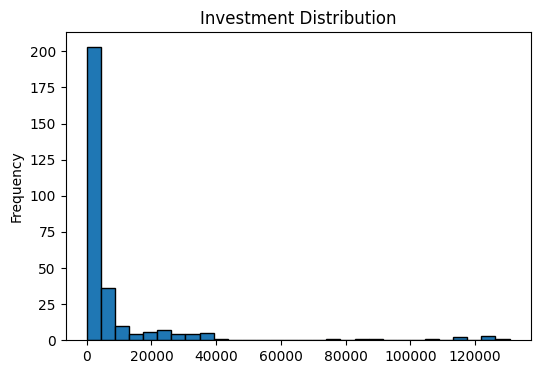

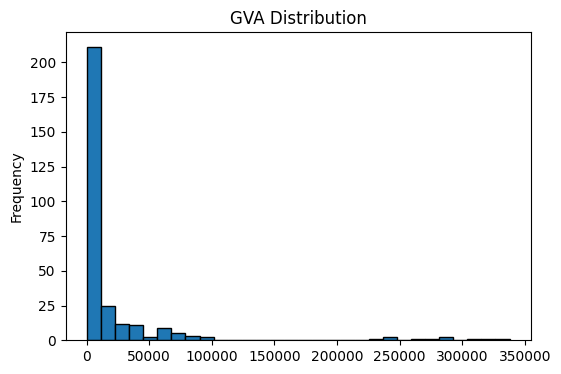

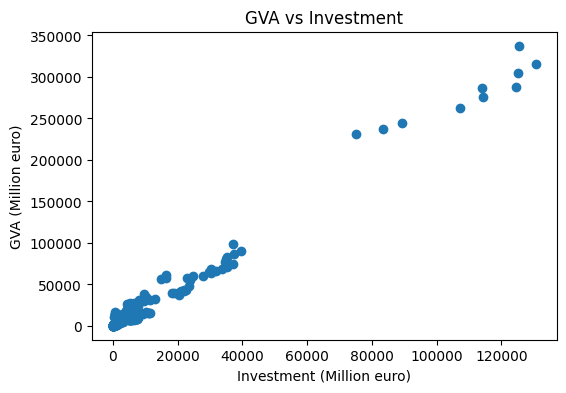

,Investment,GVA
Investment,1.00000,0.99144
GVA,0.99144,1.00000


In [ ]:
# Distribution of Investment
df["Investment"].plot(kind="hist", bins=30, edgecolor="black", figsize=(6,4))
plt.title("Investment Distribution")
plt.show()

# Distribution of GVA
df["GVA"].plot(kind="hist", bins=30, edgecolor="black", figsize=(6,4))
plt.title("GVA Distribution")
plt.show()

# Scatter plot: is it safe to assume our data is linearly correlated?
plt.figure(figsize=(6,4))
plt.scatter(df["Investment"], df["GVA"])
plt.xlabel("Investment (Million euro)")
plt.ylabel("GVA (Million euro)")
plt.title("GVA vs Investment")
plt.show()

#we compute the correlation here:
df[["Investment","GVA"]].corr()

In [14]:
#Training Feature
X = df[["Investment"]].values
#Prediction Feature
y = df["GVA"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Intercept: -28.37026822216285
Coefficient: [2.48033691]
RMSE: 6274.814174208716
R²: 0.9854505262792426


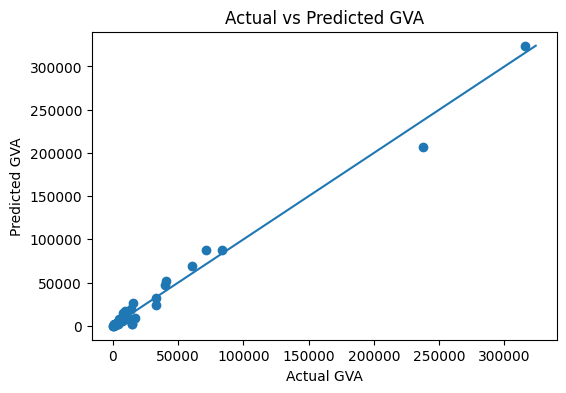

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
lo = min(y_test.min(), y_pred.min())
hi = max(y_test.max(), y_pred.max())
plt.plot([lo, hi], [lo, hi])
plt.xlabel("Actual GVA")
plt.ylabel("Predicted GVA")
plt.title("Actual vs Predicted GVA")
plt.show()

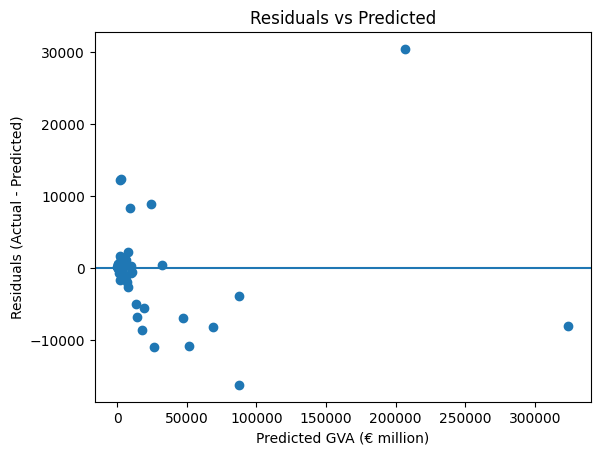

In [ ]:


#residuals plot: let us check the difference between our prediction and the real y value:
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted GVA (€ million)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

# print coefficients (intercept and slope)
# print("Intercept:", model.intercept_)
# print("Slope for Investment:", model.coef_)